# OpenCV 라이브러리 활용

## 사전 준비(환경설정) 
1. anaconda navigator에서 environments --> uninstalled, cv 검색
2. libopencv, opencv, py-opencv install
3. sample image 여러개 준비

## 라이브러리 import

In [23]:
import cv2
#matplotlib과 연동하기 위함
import matplotlib.pyplot as plt 
import numpy as np

### 이미지 처리 방법

1) 픽셀 기반 처리 : 픽셀 값을 직접 처리 <br>
2) 영역 기반 처리 : 픽셀을 그룹해서 처리 <br>
3) 주파수 기반 처리 : 픽셀값을 주파수로 변환하여 처리

## 픽셀값 읽기

In [9]:
img = cv2.imread("img01.png")

px = img[200, 100]
print(px) 
# B G R (A)

[235 224 187]


In [10]:
# 이미지에 빨간색 점을 찍어보자

img[201, 100] = [0, 0, 255]
img[200, 101] = [0, 0, 255]
img[201, 101] = [0, 0, 255]
img[200, 100] = [0, 0, 255]

# --> 이미지의 해당 픽셀을 빨간색으로 변경

cv2.imshow('',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 이미지 속성

In [11]:
# 이미지의 크기와 컬러 채널 수 ( 3 : BGR, 1: GRAY)
img.shape 

(358, 640, 3)

In [12]:
# 전체 픽셀 수 
img.size 

687360

In [13]:
# 픽셀 값의 데이터 타입
# unit8 : unsigned (양수인) int (정수형) 8 (8비트0 ~ 255)
img.dtype 

dtype('uint8')

## ROI ( Region of Image) : 이미지에서 원하는 영역 자르기

In [14]:
subimg = img[100:200, 200:300] #해당 픽셀 범위만큼의 이미지를 자름

cv2.imshow('', subimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 그리기 함수
1. cv2.line(이미지, 시작점 좌표, 끝점 좌표, 색상, 두께) : 선 그리기
2. cv2.circle(이미지, 중심 좌표, 반지름, 색상, 두께) : 원 그리기
3. cv2.rectangle(이미지, 좌상단 좌표, 우하단 좌표, 색상, 두께) : 사각형 그리기
4. cv2.ellipse(이미지, 중심좌표, 장축길이/단축길이, 시작 각도, 끝 각도, 색상, 두께) : 타원 그리기
5. cv2.putText(이미지, 출력내용, 시작좌표, 색상, 굵기) : 텍스트 출력

In [15]:
lenna = cv2.imread('./data/lenna.png')

In [16]:
# 선 그리기
# cv2.line(이미지, 시작점 좌표, 끝점 좌표, 색상, 두께)

lenna = cv2.line(lenna , (100, 100), (100, 200) , (0, 0, 255), 3)

cv2.imshow('', lenna)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
# 원 그리기
# cv2.circle(이미지, 중심 좌표, 반지름, 색상, 두께)

lenna = cv2.circle(lenna , (150, 150), 20, (255, 0, 0), 2)

cv2.imshow('', lenna)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
# 사각형 그리기
# cv2.rectangle(이미지, 좌상단 좌표, 우하단 좌표, 색상, 두께)

lenna = cv2.rectangle(lenna , (200, 200), (300, 300), (255, 255, 255), 2)

cv2.imshow('', lenna)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
# 타원 그리기
# cv2.ellipse(이미지, 중심좌표, 장축길이/단축길이, 시작 각도, 끝 각도, 색상, 두께)

lenna = cv2.ellipse(lenna, (150, 150), (100, 50), 0, 0, 360, (255,255,0), 5)

cv2.imshow('', lenna)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
# 텍스트 그리기
# cv2.putText(이미지, 출력내용, 시작좌표, 색상, 굵기)

cv2.putText(lenna,'hihihi',(30,150), cv2.FONT_HERSHEY_COMPLEX, 1,(0, 0, 0),2,cv2.LINE_AA)

cv2.imshow('', lenna)
cv2.waitKey(0)
cv2.destroyAllWindows()

## RGB --> HSV(색상,채도,명도)

In [21]:
ball = cv2.imread('./data/balloon.jpg')

hsv = cv2.cvtColor(ball, cv2.COLOR_BGR2HSV)

## 이미지에서 특정 색상만 추출해보자

In [22]:
# 추출할 색상 범위(이걸 잘 조율하면 됨) : lowr, higher
# 빨간색 추출
lower = np.array( [-10, 100, 100])
higher = np.array([10, 255, 255])


# 범위 마스크 설정 
mask = cv2.inRange(hsv, lower, higher)
img2 = cv2.bitwise_and(ball, ball, mask = mask)

cv2.imshow('', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
# 파란색 추출
lower_blue = np.array( [100, 100, 100])
higher_blue = np.array([130, 255, 255])

mask = cv2.inRange(hsv, lower_blue, higher_blue)
img2 = cv2.bitwise_and(ball, ball, mask = mask)

cv2.imshow('', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
# 노란색 추출
lower_yellow = np.array( [10, 100, 100])
higher_yellow = np.array([30, 255, 255])

mask = cv2.inRange(hsv, lower_yellow, higher_yellow)
img2 = cv2.bitwise_and(ball, ball, mask = mask)

cv2.imshow('', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
# 초록색 추출
lower_green = np.array( [40, 100, 100])
higher_green = np.array([80, 255, 255])

mask = cv2.inRange(hsv, lower_green, higher_green)
img2 = cv2.bitwise_and(ball, ball, mask = mask)

cv2.imshow('', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 침식 (erosion) 과 팽창 (dilation)
- 침식 : 이미지 경계부분을 배경 픽셀로 변경
- 팽창 : 이미지 배경부분을 전경 픽셀로 변경

In [31]:
words = cv2.imread('./data/words.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('original', words)

# (3,3) 크기 배열에 1로 초기화
kernel = np.ones((2,2), np.uint8)

#침식
erosion = cv2.erode(words, kernel, iterations=2)

cv2.imshow('erosion', erosion)

cv2.waitKey(0)
cv2.destroyAllWindows()

# --> original과 비교해서 erosion 글자들의 두께가 얇아짐을 확인

In [32]:
kernel = np.ones((2,2), np.uint8)

#팽창
dilation = cv2.dilate(words, kernel, iterations=2)

cv2.imshow('original', words)
cv2.imshow('dilation', dilation)

cv2.waitKey(0)
cv2.destroyAllWindows()

# --> original과 비교해서 dilation 글자들의 두께가 굵어짐을 확인

## Opening과 Closing
- opening : 침식 후에 팽창
- closing : 팽창 후에 침식

In [33]:
# 검정 배경에 흰색 잡음 처리 --> Opening
numA = cv2.imread('./data/a.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('original' , numA)

kernel = np.ones((3,3), np.uint8)

# Opening
opening = cv2.morphologyEx(numA, cv2.MORPH_OPEN, kernel)

cv2.imshow('opening', opening)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
# 흰색 글씨에 검정색 잡음 처리 --> Closing 
numB = cv2.imread('./data/b.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('original' , numB)

kernel = np.ones((4,4) , np.uint8)

# Closing
closing = cv2.morphologyEx(numB, cv2.MORPH_CLOSE, kernel)

cv2.imshow('closing' , closing)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 이미지 특성 추출 : Edge

In [35]:
# Canny 엣지 검출기 --> 이미지의 테두리만 추출

ball = cv2.imread('./data/balloon.jpg', cv2.IMREAD_GRAYSCALE) 

# 이미지, 최소값, 최대값
edge = cv2.Canny(ball, 200,550)

cv2.imshow('canny', edge)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 윤곽선 (Contour) : 닫힌 외곽선 (폐곡선)
- 이미지의 특정 윤곽선을 추출해보자

In [37]:
ball = cv2.imread('./data/balloon.jpg', cv2.IMREAD_GRAYSCALE)

# 127보다 큰 값은 255로 변경
_, th = cv2.threshold(ball, 220, 255, 0)

cv2.imshow('th', th)

# 윤곽선 추출
# cv2.RETR_TREE : 모든 윤곽선을 추출하고 상관관계까지 추출
# CHAIN_APPROX_SIMPLE : 윤곽선의 끝점 정보만 가져오는 기능

_, contours, _ = cv2.findContours(th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 원본 이미지, 윤곽선, 출력할 윤곽선 번호, 색상, 두께
cv2.drawContours(ball, contours, 11, (0,0, 255), 2)

cv2.imshow('contour', ball)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 히스토그램
- 픽셀 값들이 이미지 내 몇 개씩 존재하는지 그래프로 나타낸 것!

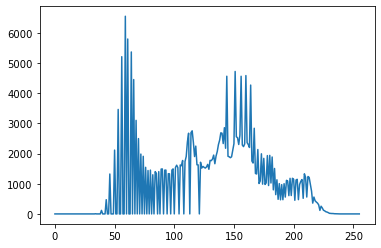

In [38]:
img = cv2.imread('./data/lenna.png', cv2.IMREAD_GRAYSCALE)

cv2.imshow('', img)

# 히스토그램
# 이미지, 채널, 필터, 색상수, x축 범위
hist = cv2.calcHist([img], [0], None, [256], [0,256])

plt.plot(hist)


cv2.waitKey(0)
cv2.destroyAllWindows()

## 히스토그램 평활화 
- 한쪽으로 치우친 값을 정규분포로 만들어 줌 --> 선명해짐

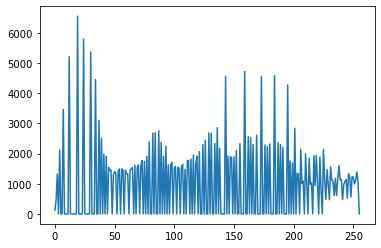

In [39]:
img2 = cv2.equalizeHist(img)

cv2.imshow('original', img)
cv2.imshow('equalize', img2)

hist2 = cv2.calcHist([img2], [0], None, [256], [0, 255])
plt.plot(hist2)

cv2.waitKey(0)
cv2.destroyAllWindows()

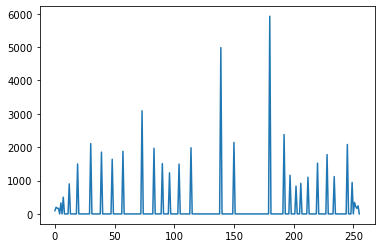

In [40]:
# 다른 이미지로 해봄

samp = cv2.imread('./data/sample.jpg', cv2.IMREAD_GRAYSCALE)
samp2 = cv2.equalizeHist(samp)
cv2.imshow('origin',samp)
cv2.imshow('equalize',samp2)

hist3 = cv2.calcHist([samp2], [0], None, [256], [0, 255])
plt.plot(hist3)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 템플릿 매칭 : 이미지 내 이미지 조작(템플릿) 이 있는지 검색 하는 작업

- 너구리 이미지에서 사과를 찾아보자! 

In [41]:
nuguri = cv2.imread('./data/nuguri.png')
nuguri_gray = cv2.cvtColor(nuguri, cv2.COLOR_RGB2GRAY)
apple = cv2.imread('./data/apple.png', cv2.IMREAD_GRAYSCALE)

# 템플릿 매칭
# 큰 이미지 / 이미지 조각(템플릿) / 매칭 방법
# res : 매칭률 (0.0 - 1.0)
res = cv2.matchTemplate(nuguri_gray, apple, cv2.TM_CCOEFF_NORMED)

# 템플릿 크기를 가져온다
w, h = apple.shape[::-1] #( w  , h )

# 매칭된 위치 값을 가져온다 ( 매칭률 70 % )
loc = np.where(res >= 0.67 ) # loc --> np.where : 위치 값 반환

for pt in zip(*loc[::-1]) :
    # 이미지, 시작 위치, 끝 위치, 색상, 두께
    cv2.rectangle(nuguri, pt, (pt[0]+w, pt[1]+h), (0, 0, 255), 2) 

cv2.imshow('match', nuguri)
cv2.waitKey(0)
cv2.destroyAllWindows()

- 사다리를 찾아보자!

In [44]:
nuguri = cv2.imread('./data/nuguri.png')
nuguri_gray = cv2.cvtColor(nuguri, cv2.COLOR_RGB2GRAY)
ladder = cv2.imread('./data/ladder.png', cv2.IMREAD_GRAYSCALE)

# 템플릿 매칭
# 큰 이미지 / 이미지 조각(템플릿) / 매칭 방법
# res : 매칭률 (0.0 - 1.0)
res = cv2.matchTemplate(nuguri_gray, ladder, cv2.TM_CCOEFF_NORMED)

# 템플릿 크기를 가져온다
w, h = ladder.shape[::-1] #( w  , h )

# 매칭된 위치 값을 가져온다 ( 매칭률 70 % )
loc = np.where(res >= 0.67 ) # loc --> np.where : 위치 값 반환

for pt in zip(*loc[::-1]) :
    # 이미지, 시작 위치, 끝 위치, 색상, 두께
    cv2.rectangle(nuguri, pt, (pt[0]+w, pt[1]+h), (0, 0, 255), 2) 

cv2.imshow('match', nuguri)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 이미지 내에서 원 찾기

In [45]:
img = cv2.imread('./data/light.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 허프 변환을 이용한 원 찾기
# 이미지, 알고리즘, 원들 사이의 거리값, canny 연산자값, 허프변환지수,
# 최소 원의 반지름, 최대 원의 반지름

circle= cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 10,
                        param1 = 60, param2=50, minRadius=10, maxRadius=100)

# 원을 검색했다면..?
if circle is not None :
    circles = np.uint16(np.around(circle))
    
    # 검색된 원을 그린다!
    # circles : 중심 x좌표, 중심 y좌표, 반지름
    for i in circles[0, :] :
        cv2.circle(img , (i[0], i[1]), i[2], (255, 0, 0), 2)
        
cv2.imshow('circle', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 코너점 찾기

In [46]:
img = cv2.imread('./data/corner.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 이미지, 코너점 개수, 임계값, 코너점간 최소거리
corner = cv2.goodFeaturesToTrack(img_gray, 25, 0.01, 10)
conter = np.int0(corner) #값을 정수로 변환

# 코너점들 출력 
for i in corner :  
    # -1 : 내부를 채움!
    x, y = i.ravel()
    cv2.circle(img, (x,y), 3, (255, 0, 0), -1)     # 다차원 배열 -> 1차원 배열     

cv2.imshow('corner', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

## ORB 알고리즘 이용한 특징점 찾기

In [47]:
img = cv2.imread('./data/butterfly.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 특징점(이미지의 특징이 되는 부분?) 찾기
orb = cv2.ORB_create()
# kp : 특징점 위치, des : 특징점 기술자
kp, des = orb.detectAndCompute(img, None)

img2 = img.copy()

for marker in kp :
    img2 = cv2.drawMarker(img2, tuple(int(i) for i in marker.pt), 
                         markerType=3, markerSize=10, thickness=1, color=(0, 0, 255))

cv2.imshow('orb', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
img1 = cv2.imread('./data/img1.png')
img2 = cv2.imread('./data/img2.png')

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


# 특징점(이미지의 특징이 되는 부분?) 찾기

orb = cv2.ORB_create()

# kp : 특징점 위치, des : 특징점 기술자
# 각각의 특징점을 찾자
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# 두개 특징점들 간 매칭을 계산한다
# crossCheck : 서로 매칭을 계산
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)

# 매칭도 별로 정렬
matches = sorted(matches, key=lambda x : x.distance)


# flags = 1 : 매칭안된 점도 표시, flags = 2 : 매칭된 점만 표시   flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
res = cv2.drawMatches(img1, kp1, img2, kp2, matches[:12], None, flags = 2) #sort 한것 중 상위 12개 추출!

cv2.imshow('orb', res)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 얼굴과 눈을 검색

In [49]:
# 눈썹 
face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./data/haarcascade_eye.xml')

img = cv2.imread('./data/face.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검색 ( 이미지, 스케일, 최소이웃값)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
# --> 얼굴의 ROI 좌표 반환

for (x,y,w,h) in faces :
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)

cv2.imshow('face', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [50]:
# 눈썹 

face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./data/haarcascade_eye.xml')

img = cv2.imread('./data/hoon2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검색 ( 이미지, 스케일, 최소이웃값)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
# --> 얼굴의 ROI 좌표 반환

for (x,y,w,h) in faces :
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
    
    # 얼굴 영역만 분리!
    roi_eye = gray[y:y+h, x:x+w]
    roi_eye_color = img[y:y+h, x:x+w]
    
    # 눈 영역을 검색
    eyes = eye_cascade.detectMultiScale(roi_eye)
    
    for(ex, ey, ew, eh) in eyes :
        cv2.rectangle(roi_eye_color, (ex,ey), (ex+ew, ey+eh), (0, 0, 255), 2)
        
cv2.imshow('face', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 영상에서 얼굴, 눈 인식

In [51]:
import cv2

# 눈썹 

face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./data/haarcascade_eye.xml')

    
try : 
    cap = cv2.VideoCapture('./data/video2.mp4')
    
    print('캡처 성공')
    
except :
    
    print('캡처 실패')    

while True :
    
    ret, frame = cap.read()
    if not ret :
        print('비디오 읽기 실패')
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
#img = cv2.imread('./data/useok.png')
    

# 얼굴 검색 ( 이미지, 스케일, 최소이웃값)
    faces = face_cascade.detectMultiScale(gray, 1.2, 2)
    # --> 얼굴의 ROI 좌표 반환

    for (x,y,w,h) in faces :
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)

        # 얼굴 영역만 분리!
        roi_eye = gray[y:y+h, x:x+w]
        roi_eye_color = frame[y:y+h, x:x+w]

        # 눈 영역을 검색
        eyes = eye_cascade.detectMultiScale(roi_eye)

        for(ex, ey, ew, eh) in eyes :
            cv2.rectangle(roi_eye_color, (ex,ey), (ex+ew, ey+eh), (0, 0, 255), 2)

    cv2.imshow('face', frame)
    
    key = cv2.waitKey(33)
    
    if key == 49 :
        cap.release()
        cv2.destroyAllWindows()
        break

캡처 성공
